#### 1. Warm up exercise

Describing a possible implementation of the circuit C in the figure to achieve the result $α|000⟩ + β|111⟩$ on the input configuration shown in the figure:

<img src="Image/img.png" width=400 />

In [1]:
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import sqrt

sampler = Sampler()

Statevector([ 0.8660254+0.j,  0.       +0.j,  0.       +0.j,
              0.       +0.j,  0.       +0.j,  0.       +0.j,
              0.       +0.j, -0.5      +0.j],
            dims=(2, 2, 2))


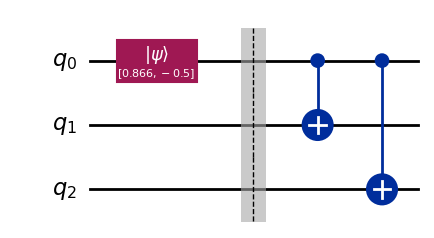

In [2]:

qc = QuantumCircuit(3)

qc.initialize([sqrt(3)/2, -1/2],0)
qc.barrier()
qc.cx(0,1)
qc.cx(0,2)

print(Statevector(qc))

# qc.decompose().draw('mpl')
qc.draw('mpl')

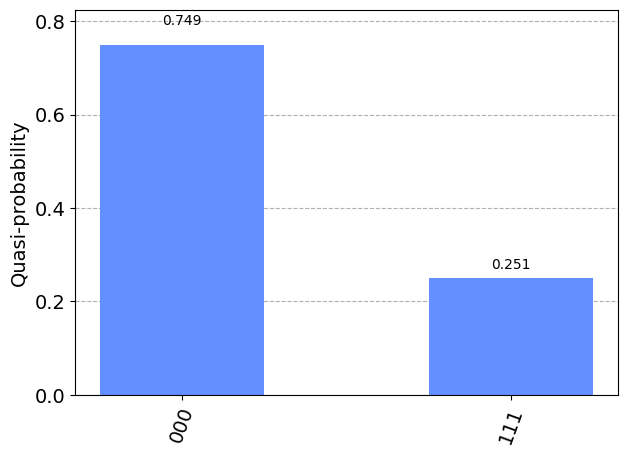

In [3]:
qc.measure_all()

job = sampler.run(qc, shots=1024)
result = job.result()
plot_histogram(result.quasi_dists[0].binary_probabilities())


#### Entanglement States

##### Pure and Mixed State

You have already discussed pure quantum states.
On the other hand, mixed states are statistical combinations of pure states.

A **pure state** is a quantum state whose wave function is known with certainty.

Conversely, a **mixed state** is a statistical distribution of pure states, represented as $\{(pi, |ψi⟩)\}$ where the pi's form a valid probability distribution $(∑_{i∈[n]}p_i = 1)$, and each $|ψ_i⟩$ is a valid (pure) state.

The **purity** of a quantum state described by the density operator ρ can be checked considering the trace, in particular:
 - (Properties of pure states):
    1. $ρ^2 = ρ$.
    2. $Tr[ρ] = 1$.
    3. $Tr[ρ^2] = 1$.
    4. $ρ ≥ 0$.

- (Properties of mixed states):
    1. $ρ^2 ≠ ρ$ in general.
    2. $Tr[ρ] = 1$.
    3. $Tr[ρ^2] < 1$.
    4. $ρ ≥ 0$.


#### Trace and Partial Trace

**Trace of a matrix**: the trace of a matrix is the sum of its diagonal elements.

Thus, we can formally define the trace of an operator:

**Trace of an operator**
The trace of an operator $ T $ is given by:
$ \text{Tr}(T) := \sum_i \langle i|T|i \rangle $
where $ \{|i\rangle\} $ represents any orthonormal basis.

The partial trace is conceptually similar to the trace but operates on a subset of the system. 
Specifically, it's used when we're interested in "tracing out" certain components of a composite system. For instance, if we have particles A and B represented by $ \rho_A $ and $ \rho_B $ respectively, the joint state of both particles is $ \rho_{AB} = \rho_A \otimes \rho_B $.

However, if we want to isolate one component, particle $B$, we perform a partial trace to "ignore" its contribution. This is useful when we're only concerned with the state of $A$, regardless of $B$'s state.

For instance, if we're interested only in particle $A$, we perform a partial trace over particle $B$.
Mathematically, this is expressed as: $ \text{Tr}_B(\rho_{AB}) = \sum_i \rho_A \otimes \langle i| \rho_B |i \rangle = \rho_A $

Here, we utilize the fact that the trace of a density operator is equal to one. In the case of a separable state like this, the resulting marginal state is simply the original state of particle A, effectively ignoring particle B. This aligns with our intention behind defining the partial trace.

However, we extend this concept in more general scenarios where the state $ \rho_{AB} $ is not separable. We leave particle A untouched and take the trace over particle B by summing over its expectation values on an orthonormal basis.

(**Partial Trace**) Let $A$ and $B$ represent two subsystems constituting the composite system described by the density operator $\rho_{AB}$.
The partial trace over the $B$ subsystem, denoted as $\text{Tr}_B$, is defined as:

$$ 
\text{Tr}_B(\rho_{AB}) := \sum_j (I_A \otimes \langle j|_B) \rho_{AB} (I_A \otimes |j\rangle_B) 
$$

Here, $ \{|j\rangle\} $ denotes any orthonormal basis for the Hilbert space $ H_B $ of subsystem $B$. We often abbreviate the resulting state as $ \rho_A \equiv \text{Tr}_B(\rho_{AB}) $.

Similarly, the partial trace over the A subsystem, denoted as $ \text{Tr}_A $, is defined as:

$$
\text{Tr}_A(\rho_{AB}) := \sum_i (\langle i|_A \otimes I_B) \rho_{AB} (|i\rangle_A \otimes I_B)
$$

Here, $ \{|i\rangle\} $ represents any orthonormal basis for subsystem $A$'s Hilbert space $ H_A $.


##### Verify the Entanglement
We can use these properties to verify if two states are entangled, in particular, given $\rho_{AB}$, $A$ is separable (not entangled) from $B$, if and only if $\text{Tr}_A(\rho_{AB})$ or $\text{Tr}_B(\rho_{AB})$ are pure state.

For example, given the pure state $ρ_{AB} = |Φ_{AB}\rangle\langleΦ_{AB}|$, where |Φ_{AB}\rangle = 1/√2 (|00⟩ + |11⟩) is the maximally entangled Bell state, and the corresponding density operator 
$$
ρ_{AB} = 1/2 (|00⟩⟨00| + |00⟩⟨11| + |11⟩⟨00| + |11⟩⟨11|)
$$ 

If we calculate the partial trace over the $B$ subsystem.
$$
Tr_B(ρ_{AB}) = 1/2 ((I_A ⊗ ⟨0|_B)ρ_{AB}(I_A ⊗ |0⟩_B) + (I_A ⊗ ⟨1|_B)ρ_{AB}(I_A ⊗ |1⟩_B)) = 1/2 [|0⟩⟨0| + |1⟩⟨1|].
$$
We obtain a mixed state.

Thus, the partial trace of the maximally entangled state results in the maximally mixed state!

Since I am good, I already provide you with the function that calculates the partial trace, to calculate the trace you can use numpy `trace` function.

In [4]:
from numpy import kron, zeros, identity, transpose, array, conjugate, sqrt, trace


# given the dimension n, return |0>,|1>,...,|n-1>
def generate_bases(n):
    bases = []
    for i in range(n):
        base = zeros((n, 1), dtype=complex)
        base[i] = 1
        bases.append(base)
    return bases


# Tr_B[ρ_AB] := ∑_j (I_A ⊗ ⟨j|_B) ρ_AB (I_A ⊗ |j⟩_B)
def trace_b(eta, d, d_b):
    d_a = int(d / d_b)
    id_a = identity(d_a, dtype=complex)
    bases = generate_bases(d_b)
    res = zeros((d_a, d_a), dtype=complex)
    for base in bases:
        m = kron(id_a, transpose(base))
        n = kron(id_a, base)
        res += m @ eta @ n

    return res


# Tr_A[ρ_AB] := ∑_i (⟨i|_A ⊗ I_B) ρ_AB (|i⟩_A ⊗ I_B)
def trace_a(eta, d, d_a):
    d_b = int(d / d_a)
    id_b = identity(d_b, dtype=complex)
    bases = generate_bases(d_a)
    res = zeros((d_b, d_b), dtype=complex)
    for base in bases:
        m = kron(transpose(base), id_b)
        n = kron(base, id_b)
        res += m @ eta @ n

    return res


We can see how this functions works on the previus example.

In [5]:

# |Φ_{AB}⟩ = 1/√2 (|00⟩ + |11⟩)
phi = array([[sqrt(2)/2 + 0j,
              0 + 0j,
              0 + 0j,
              sqrt(2)/2 + 0j]]).transpose()


#ρ_{AB} = |Φ_{AB}⟩⟨Φ_{AB}|
rho = phi @ conjugate(phi.transpose())

dim, dim_a, dim_b = 2 ** 2, 2 ** 1, 2 ** 1
ra = trace_a(rho, dim, dim_a)
rb = trace_b(rho, dim, dim_b)
ra

array([[0.5+0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j]])

In [6]:
r_square = ra @ ra
trace(r_square)

(0.5000000000000002+0j)

##### Exercise

Let's consider the following circuit:

<img src="Image/img_1.png" width=400 />


Let's verify that if $|a\rangle$ and $|b\rangle$ are two Bell states, then the states $|c\rangle$ and $|d\rangle$ obtained through the circuit form an entangled qubit pair, while $|c\rangle$and $|d\rangle$ are separable from each other.

**Solution**

First we build the circuit

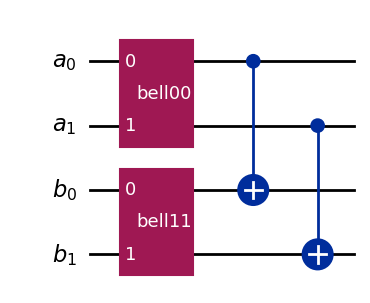

In [13]:
def prepare_bell00():
    bell = QuantumCircuit(2, name='bell00')
    bell.h(0)
    bell.cx(0, 1)
    
    return bell

def prepare_bell11():
    bell = QuantumCircuit(2, name='bell11')
    bell.initialize([0,0,0,1],[0,1])
    bell.h(0)
    bell.cx(0, 1)
    
    return bell

qc = QuantumCircuit(QuantumRegister(2, name='a'), QuantumRegister(2, name='b'))
qc.append(prepare_bell00(),[0,1])
qc.append(prepare_bell11(),[2,3])
qc.cx(0,2)
qc.cx(1,3)

qc.decompose().draw('mpl')
qc.draw('mpl')


Let's check the entaglement using the partial trace

In [8]:
# compute the density matrix
phi = array(Statevector(qc))
phi = phi.reshape(-1,1)
rho = phi @ conjugate(phi.transpose())

dim, dim_c, dim_d = 2 ** 4, 2 ** 2, 2 ** 2
rd = trace_a(rho, dim, dim_c)
rc = trace_b(rho, dim, dim_d)

r_square = rc @ rc
print(trace(r_square))

r_square = rd @ rd
print(trace(r_square))


(1+0j)
(1+0j)


The trace is one (or almost one due to the approximation), so $c$ and $d$ are not entangled with each other.

We can check that the pairs ($c1$,$c2$) and ($d1,d2$) are entangled:

In [9]:
dim_c1, dim_d1 = 2, 2
rc1 = trace_a(rc, dim_c, dim_c1)
rd1 = trace_a(rd, dim_d, dim_d1)

r_square = rc1 @ rc1
print(trace(r_square))

r_square = rd1 @ rd1
print(trace(r_square))

(0.5+0j)
(0.5+0j)


Now we can check this property for all bell states:

In [10]:

from itertools import product


def generate_bell_state(state):
    bell = QuantumCircuit(2, name='bell')
    bell.initialize(state,[0,1])
    bell.h(0)
    bell.cx(0, 1)
    
    return bell
# we try for 00,01,10,11
starting_states = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
for a, b in product(starting_states, starting_states):
    qc = QuantumCircuit(QuantumRegister(2, name='a'), QuantumRegister(2, name='b'))
    qc.append(generate_bell_state(a),[0,1])
    qc.append(generate_bell_state(b),[2,3])
    qc.cx(0,2)
    qc.cx(1,3)
    phi = array(Statevector(qc))
    phi = phi.reshape(-1,1)
    rho = phi @ conjugate(phi.transpose())
    dim, dim_c, dim_d = 2 ** 4, 2 ** 2, 2 ** 2
    rd = trace_a(rho, dim, dim_c)
    rc = trace_b(rho, dim, dim_c)
    print('c and d entagled: %s' % ('No' if trace(rd @ rd) > 0.999 else 'Yes'))
    dim_c1, dim_d1 = 2, 2
    rc1 = trace_a(rc, dim_c, dim_c1)
    rd1 = trace_a(rd, dim_d, dim_d1)
    print('c0 and c1 entagled: %s' % ('No' if trace(rc1 @ rc1) > 0.999 else 'Yes'))
    print('d0 and d1 entagled: %s' % ('No' if trace(rd1 @ rd1) > 0.999 else 'Yes'))

    

c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 entagled: Yes
d0 and d1 entagled: Yes
c and d entagled: No
c0 and c1 ent